
# Project : Investigate a Dataset of TMDb movie data 
(cleaned from original data on Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### in this project i try to clean and analyze dataset of movies from any duplication and any missing to do the analysis in a efficient mannar, then i try to ask a some questions about this dataset and these questions are :

#### Q1 : director that generate the highest revenue
#### Q2 : 5 movies had the highest budgets 
#### Q3 : what is the 3 movies has the smallest popularity




In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

here i load the dataset to work on it ,then i will check if the dataset clean or not ,and if not i will try to clean it from any unusable data and any duplication, below i will explain what i did in details   

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')

### Data Cleaning

In [3]:
df.shape


(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### remove unnessesary columns 
here i drop some columns that are useless in the dataset and will not help me in my analysis and that's will make the dataset cleaner to work on 

In [6]:
df.drop(['keywords','homepage','overview','cast','tagline'], axis=1 , inplace=True)

In [7]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


this is the result after dropping the useless columns

### Check if there is a null values 

In [8]:
df.fillna(df.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

as we can see in this result there is some columns that have a null values since their entries not equals 10866, so we have to drop these records that have a null values

### To drop the null values 

In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9805 non-null   int64  
 1   imdb_id               9805 non-null   object 
 2   popularity            9805 non-null   float64
 3   budget                9805 non-null   int64  
 4   revenue               9805 non-null   int64  
 5   original_title        9805 non-null   object 
 6   director              9805 non-null   object 
 7   runtime               9805 non-null   int64  
 8   genres                9805 non-null   object 
 9   production_companies  9805 non-null   object 
 10  release_date          9805 non-null   object 
 11  vote_count            9805 non-null   int64  
 12  vote_average          9805 non-null   float64
 13  release_year          9805 non-null   int64  
 14  budget_adj            9805 non-null   float64
 15  revenue_adj         

as we can see in the result of this code now there is no record have a null values all of them have the same number of entries = 9805 

### check and remove any duplication


In [10]:
#to avoid the repeating when we try to check and remove duplications we need to do a method
def Duplicatee():
    return sum(df.duplicated())
Duplicatee()

1

In [11]:
df.sort_values('id', inplace = True)  
df.drop_duplicates(subset = 'id', keep = False, inplace = True)
df

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8088,5,tt0113101,1.234890,4000000,4300000,Four Rooms,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06
10249,6,tt0107286,0.815631,0,12136938,Judgment Night,Stephen Hopkins,110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,10/15/93,36,6.4,1993,0.000000e+00,1.832034e+07
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
4955,12,tt0266543,3.440519,94000000,864625978,Finding Nemo,Andrew Stanton|Lee Unkrich,100,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|D...,5/30/03,3692,7.4,2003,1.114231e+08,1.024887e+09
4179,13,tt0109830,6.715966,55000000,677945399,Forrest Gump,Robert Zemeckis,142,Comedy|Drama|Romance,Paramount Pictures,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,395560,tt3108244,0.142759,1300000,0,Capsule,Andrew Martin,91,Drama|History|Thriller|Science Fiction,Ecaveo Capital Partners|Hermes Space Industries,12/23/15,11,5.3,2015,1.195999e+06,0.000000e+00
352,395883,tt4073890,0.333656,0,0,Andron,Francesco Cinquemani,100,Action|Science Fiction,Ambi Pictures,11/8/15,24,4.7,2015,0.000000e+00,0.000000e+00
1217,409696,tt3718778,0.107621,0,0,Over the Garden Wall,Nate Cash,110,Adventure|Animation|Family|Fantasy,Cartoon Network Studios,11/3/14,12,7.8,2014,0.000000e+00,0.000000e+00
3826,414419,tt6019206,0.146477,30000000,0,Kill Bill: The Whole Bloody Affair,Quentin Tarantino,247,Crime|Action,Miramax Films|A Band Apart|Super Cool ManChu,3/28/11,28,8.1,2011,2.908194e+07,0.000000e+00


In [12]:
#just to make sure that there is no more duplication
Duplicatee()

0

the result now is 0 so there is no duplication 

### To remove the zero values

In [13]:
#check if we have a zero or less than 1 values 
len(df.query('revenue<1')) , len (df.query('budget<1'))

(5052, 4775)

the result is not equals (0,0) mso that means there is a zero values that may effect my analysis

### To remove the zero values

In [14]:
zeroRevenue=df[df['revenue']<1] #removes any value less than 1
df.drop(zeroRevenue.index,axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4751 entries, 8088 to 3460
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4751 non-null   int64  
 1   imdb_id               4751 non-null   object 
 2   popularity            4751 non-null   float64
 3   budget                4751 non-null   int64  
 4   revenue               4751 non-null   int64  
 5   original_title        4751 non-null   object 
 6   director              4751 non-null   object 
 7   runtime               4751 non-null   int64  
 8   genres                4751 non-null   object 
 9   production_companies  4751 non-null   object 
 10  release_date          4751 non-null   object 
 11  vote_count            4751 non-null   int64  
 12  vote_average          4751 non-null   float64
 13  release_year          4751 non-null   int64  
 14  budget_adj            4751 non-null   float64
 15  revenue_adj       

In [15]:
zeroRevenue=df[df['budget']<1] #removes any value less than 1
df.drop(zeroRevenue.index,axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 8088 to 3460
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3806 non-null   int64  
 1   imdb_id               3806 non-null   object 
 2   popularity            3806 non-null   float64
 3   budget                3806 non-null   int64  
 4   revenue               3806 non-null   int64  
 5   original_title        3806 non-null   object 
 6   director              3806 non-null   object 
 7   runtime               3806 non-null   int64  
 8   genres                3806 non-null   object 
 9   production_companies  3806 non-null   object 
 10  release_date          3806 non-null   object 
 11  vote_count            3806 non-null   int64  
 12  vote_average          3806 non-null   float64
 13  release_year          3806 non-null   int64  
 14  budget_adj            3806 non-null   float64
 15  revenue_adj       

In [16]:
len(df.query('revenue<1')) , len (df.query('budget<1'))

(0, 0)

the result means that now there is no zero values now 

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 : director that generate the highest revenue

In [17]:
df2 = df.nlargest(1,'revenue')
print(df2['director'])

1386    James Cameron
Name: director, dtype: object


James Cameron is the director that generate the highest revenue in the dataset 

### Q2 : 5 movies had the highest budgets 

In [18]:
df['budget'] = df['budget'].astype('int')
print(df.sort_values('budget', ascending=False).head(5)[['budget', 'id','original_title']])

         budget     id                               original_title
2244  425000000  46528                            The Warrior's Way
3375  380000000   1865  Pirates of the Caribbean: On Stranger Tides
7387  300000000    285     Pirates of the Caribbean: At World's End
14    280000000  99861                      Avengers: Age of Ultron
6570  270000000   1452                             Superman Returns


the 5 Movies that have the highest budget are : The Warrior's Way, Pirates of the Caribbean: On Stranger Tides ,Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, Superman Returns

### Q3 : what is the 3 movies has the smallest popularity

Text(0, 0.5, 'popularity')

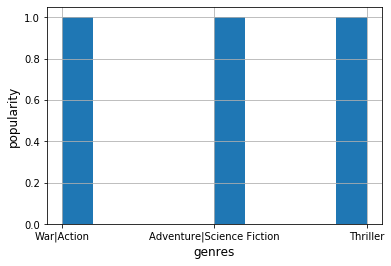

In [19]:
d=df.nsmallest(3,'popularity') 
d['genres'].hist(figsize=(6,4))
plt.xlabel('genres',fontsize=12)
plt.ylabel('popularity',fontsize=12)

this figure represent the relationship between popularity and geners and i summarized the 3 smallest popularity of geners ,and i found that these geners are War|Action , Adventure|science Fiction , Thriller.
there's many reasons for why they don't have high popularity, for instance, maybe the story is boring or the director or the actors don't have high skills on their work.


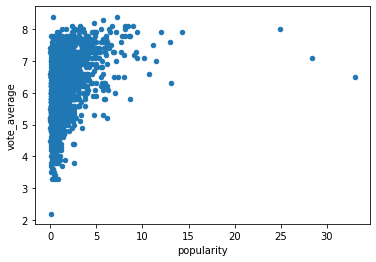

In [23]:
df.plot(x='popularity',y='vote_average',kind='scatter')


As we can see here , the relationship seems in general as when the vote average increase the popularity fixed at zero in most cases but there is an exception as we can see in the graph sometimes when the popularity increased also the vote average increase ,but in general we can estimate that the popularity does not effect by the vote average.

<a id='conclusions'></a>
## Conclusions

### in Conclusion, After i analyzed the data i reached some results :
#### -First of all, One of my Questions is who's the most first director that generate the highest revenue and the result was James Cameron who is top one reached that.
#### -the second one defined what is the 5 movies had the highest budget and the result was: The Warrior's Way, Pirates of the Caribbean: On Stranger Tides ,Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, Superman Returns.
#### -the third one is a graph shows the 3 smallest popularity movies, and i found that these geners are War|Action , Adventure|science Fiction , Thriller. and of course there's many reasons for why the don't have high popularity, for instance, maybe the story is boring or the director or the actors don't have high skills un their work.
#### -the last one is also a graph that shows the relationship between vote average and popularity and i noticed that the relationship seems in general as when the vote average increase the popularity fixed at zero in most cases but there is an exception as we can see in the graph sometimes when the popularity increased also the vote average increase ,but in general we can estimate that the popularity does not effect by the vote average.From this analysis we can get the basics idea about popularity so it can be affected by another features or variables.

### Limitations:
   #### since there's about 1061 records has a null values and i drop it to make the analysis easy but one the other hand maybe this analysis is not accurate 100% , for instance, mayby there is one director has the highest revenue from the one i got in my analysis since i drop some records as i said before..
   #### also i faced some problem when i anaylze the data graphicaly there is some values i can't use it because  maybe it contains a huge data and this make it difficult to work with.  